In [31]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras

Load mnist dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_name =["T-shirt/top", " Trouser", " Pullower", "Dress", "Coat","sandal", "Shirt", "Sneaker", "Bag","Ankel oot"]

Data reshape

In [11]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

Data normalization

In [20]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [21]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test_n

create model architecture

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

create model cnn

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 32, kernel_size= (3,3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [42]:
model_history = model.fit(X_train, Y_train, epochs=10, batch_size= 64,
                          validation_data=(X_valid, Y_valid))

Epoch 1/10
860/860 [==============================] - 39s 45ms/step - loss: 0.3252 - accuracy: 0.8826 - val_loss: 0.3631 - val_accuracy: 0.8672
Epoch 2/10
860/860 [==============================] - 37s 44ms/step - loss: 0.3148 - accuracy: 0.8861 - val_loss: 0.3345 - val_accuracy: 0.8818
Epoch 3/10
860/860 [==============================] - 37s 43ms/step - loss: 0.3057 - accuracy: 0.8875 - val_loss: 0.5986 - val_accuracy: 0.7908
Epoch 4/10
860/860 [==============================] - 38s 44ms/step - loss: 0.2971 - accuracy: 0.8927 - val_loss: 0.3234 - val_accuracy: 0.8840
Epoch 5/10
860/860 [==============================] - 39s 45ms/step - loss: 0.2911 - accuracy: 0.8936 - val_loss: 0.3108 - val_accuracy: 0.8878
Epoch 6/10
860/860 [==============================] - 37s 43ms/step - loss: 0.2819 - accuracy: 0.8968 - val_loss: 0.2993 - val_accuracy: 0.8972
Epoch 7/10
860/860 [==============================] - 37s 43ms/step - loss: 0.2755 - accuracy: 0.9001 - val_loss: 0.3258 - val_accuracy:

In [43]:
model_history.history

{'accuracy': [0.8825818300247192,
  0.8860727548599243,
  0.8875454664230347,
  0.8927454352378845,
  0.8936181664466858,
  0.8968181610107422,
  0.9001454710960388,
  0.9015091061592102,
  0.9032909274101257,
  0.9059090614318848],
 'loss': [0.3251953721046448,
  0.31480270624160767,
  0.30573415756225586,
  0.29708656668663025,
  0.29111525416374207,
  0.28194883465766907,
  0.27549678087234497,
  0.26923683285713196,
  0.26354482769966125,
  0.2571025490760803],
 'val_accuracy': [0.8672000169754028,
  0.8817999958992004,
  0.7907999753952026,
  0.8840000033378601,
  0.8877999782562256,
  0.8971999883651733,
  0.8880000114440918,
  0.852400004863739,
  0.8924000263214111,
  0.8849999904632568],
 'val_loss': [0.36307743191719055,
  0.33451563119888306,
  0.5985602736473083,
  0.32339605689048767,
  0.31077298521995544,
  0.2992817759513855,
  0.3257695436477661,
  0.38650238513946533,
  0.2998661994934082,
  0.3124140202999115]}

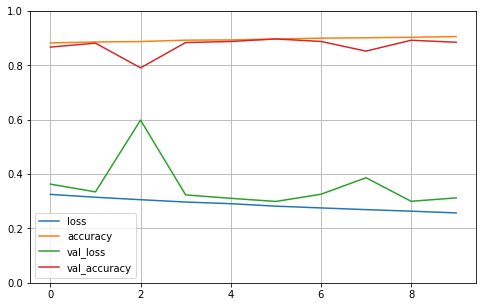

In [44]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [45]:
ev = model.evaluate(X_test_n, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.8975 - accuracy: 0.1002


In [46]:
ev

[2.8975167274475098, 0.10019999742507935]

In [47]:
X_new =X_test[:3]

In [51]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)

In [52]:
Y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


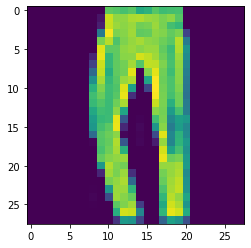

In [65]:
print(plt.imshow(X_test[5].reshape((28, 28))))

In [56]:
keras.backend.clear_session

<function keras.backend.clear_session>